# preprocessing

In [1]:
import numpy as np
import pandas as pd
import torch
from matplotlib import pyplot as plt

In [2]:
# load data
data_dir = "data/"

college_players_stats = pd.read_csv(f'{data_dir}college_players_stats.csv', index_col=0)
drafted_players = pd.read_csv(f'{data_dir}drafted_players.csv', index_col=0)
not_drafted = pd.read_csv(f'{data_dir}not_drafted.csv', index_col=0)
players_stats = pd.read_csv(f'{data_dir}players_stats.csv', index_col=0)

# add label and normalize relevant values

players_stats['drafted'] = players_stats['name'].isin(drafted_players['name'])
players_stats['drafted'] = players_stats['drafted'].astype(int)


# add label and normalize relevant values

players_stats['drafted'] = players_stats['name'].isin(drafted_players['name'])
players_stats['drafted'] = players_stats['drafted'].astype(int)
players_stats = players_stats.drop(columns=['name'])

# discretize height
def convert_height(height_str):
    feet, inches = map(int, height_str.split('-'))
    return feet + inches / 12  

# Apply the conversion function to the height column
players_stats['height'] = players_stats['height'].apply(convert_height)

# add binary columns for each position label
def str_to_int(maybe_bool):
    if isinstance(maybe_bool, bool):
        return int(maybe_bool) 
    return maybe_bool

def weight_to_int(input):
    if(input == "22l"):
        return 221
    return(int(input)) 
players_stats['weight'] = players_stats['weight'].apply(weight_to_int)

players_stats = pd.get_dummies(players_stats, columns=['position'])
players_stats = players_stats.applymap(str_to_int)

players_stats.info()
non_numeric_columns = players_stats.select_dtypes(exclude=["number"]).columns
print("Non-numeric columns:", non_numeric_columns)

# TODO: add other metrics for training
df = players_stats

df.dropna(inplace=True)
pd.set_option('display.max_columns', None)
df.head()

/var/folders/2x/719ln_714y74dz825_4kskt40000gn/T/ipykernel_36038/1988355783.py:42: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  players_stats = players_stats.applymap(str_to_int)


<class 'pandas.core.frame.DataFrame'>
Index: 31860 entries, 0 to 31859
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   height                     31860 non-null  float64
 1   weight                     31860 non-null  int64  
 2   games_played               31860 non-null  int64  
 3   games_started              31860 non-null  int64  
 4   min_per                    31573 non-null  float64
 5   field_goal                 31860 non-null  float64
 6   field_attmps               31860 non-null  float64
 7   field_pct                  31127 non-null  float64
 8   two_pointer                31860 non-null  float64
 9   two_pattamps               31860 non-null  float64
 10  two_pct                    30592 non-null  float64
 11  three_ptrs                 31860 non-null  float64
 12  three_pattmp               31860 non-null  float64
 13  three_pct                  31127 non-null  float64


,height,weight,games_played,games_started,min_per,field_goal,field_attmps,field_pct,two_pointer,two_pattamps,two_pct,three_ptrs,three_pattmp,three_pct,free_throws,free_attmps,free_pct,assists,steals,blocks,points,off_reb,def_reb,total_reb,turnovers,drafted,position_Center,position_Center-Forward,position_Forward,position_Forward-Center,position_Forward-Guard,position_Forward-PF,position_Forward-SF,position_Forward-SF-Guard,position_Guard,position_Guard-Forward,position_Guard-PG,position_Guard-SG,position_PForward,position_PForward-F,position_PGuard,position_PGuard-G,position_SForward,position_SForward-F,position_SGuard-G
0,6.416667,215,41,19,13.3,0.9,2.1,0.414,0.9,2.0,0.429,0.0,0.1,0.414,0.7,1.2,0.529,0.1,0.4,0.3,2.4,1.3,1.7,3.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6.750000,225,115,16,11.2,1.5,2.3,0.619,1.5,2.3,0.619,0.0,0.0,0.619,0.6,0.7,0.788,0.2,0.2,0.8,3.5,0.7,1.6,2.3,0.6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6.416667,210,92,29,16.4,1.4,4.0,0.346,0.4,1.2,0.360,0.9,2.8,0.346,0.4,0.6,0.611,0.6,0.4,0.2,4.1,0.6,1.4,2.0,0.8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6.666667,210,107,55,19.0,3.1,6.5,0.473,3.1,6.5,0.474,0.0,0.0,0.473,1.8,2.8,0.641,0.4,0.5,0.7,7.9,2.5,3.2,5.7,1.2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6.750000,322,86,72,24.5,4.3,7.8,0.544,4.3,7.8,0.544,0.0,0.0,0.544,2.0,4.1,0.482,0.3,0.6,0.6,10.5,3.1,4.3,7.3,1.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
np.unique(df['drafted'], return_counts=True)

(array([0, 1]), array([27611,  1003]))

# models

In [4]:
seed = 42
epochs = 250
lr = 0.01
batch_size = 32

# get data
x = df.drop(columns=['drafted']).values
y = df['drafted'].values


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)

# downsampling
#separate drafted and non-drafted 
df_drafted = df[df['drafted'] == 1]
df_non_drafted = df[df['drafted'] == 0]


# Drop 20000 random samples from non-drafted
df_non_drafted_sampled = df_non_drafted.sample(len(df_non_drafted) - 20000, random_state=seed)

df_downsampled = pd.concat([df_drafted, df_non_drafted_sampled])
x = df_downsampled.drop(columns=['drafted']).values
y = df_downsampled['drafted'].values

xd_train, xd_test, yd_train, yd_test = train_test_split(x, y, test_size=0.2, random_state=seed)



count = 0
count_tot = 0
for y1,y2 in zip(y_train, y_test):
    if(y1 == 1):
        count+=1
    if(y2 == 1):
        count+=1
    count_tot +=1

print("Count drafted:")
print(count)
print("Count not drafted:")
print(count_tot)

np.unique(y_test, return_counts=True)

count = 0
count_tot = 0
for y1,y2 in zip(yd_train, yd_test):
    if(y1 == 1):
        count+=1
    if(y2 == 1):
        count+=1
    count_tot +=1

print("Count downsample drafted:")
print(count)
print("Count downsample not drafted:")
print(count_tot)

np.unique(y_test, return_counts=True)

Count drafted:
408
Count not drafted:
5723
Count downsample drafted:
418
Count downsample not drafted:
1723


(array([0, 1]), array([5516,  207]))

In [5]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def explain(y_test, y_pred, average='weighted'):
    """Look at precision, recall etc. for the model"""
    precision = precision_score(y_test, y_pred, average=average, zero_division=0)
    recall = recall_score(y_test, y_pred, average=average, zero_division=0)
    f1 = f1_score(y_test, y_pred, average=average, zero_division=0)
    accuracy = accuracy_score(y_test, y_pred)

    print("Precision: ", precision)
    print("Recall: ", recall)    
    print("F1: ", f1)
    print("Accuracy: ", accuracy)
    print("Distribution", np.unique(y_pred, return_counts=True))

    return {
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "accuracy": accuracy
    }

Logistic Regression


/opt/anaconda3/envs/hwenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precision:  0.6672360320325881
Recall:  0.5316409356356389
F1:  0.547456222020993
Accuracy:  0.9620828236938669
Distribution (array([0, 1]), array([5685,   38]))



Decision Tree
Precision:  0.5902461683590912
Recall:  0.6159582313025261
F1:  0.6010563569092177
Accuracy:  0.9363969945832605
Distribution (array([0, 1]), array([5454,  269]))



Random Forest
Precision:  0.6966819307859771
Recall:  0.513767590461477
F1:  0.5178397444295518
Accuracy:  0.9634806919447843
Distribution (array([0, 1]), array([5709,   14]))



Naive Bayes
Precision:  0.5200932897398106
Recall:  0.5941591085047275
F1:  0.2176077961440067
Accuracy:  0.24008387209505505
Distribution (array([0, 1]), array([1177, 4546]))



SVM
Precision:  0.4819150795037568
Recall:  0.5
F1:  0.4907909956401815
Accuracy:  0.9638301590075136
Distribution (array([0]), array([5723]))





<Axes: >

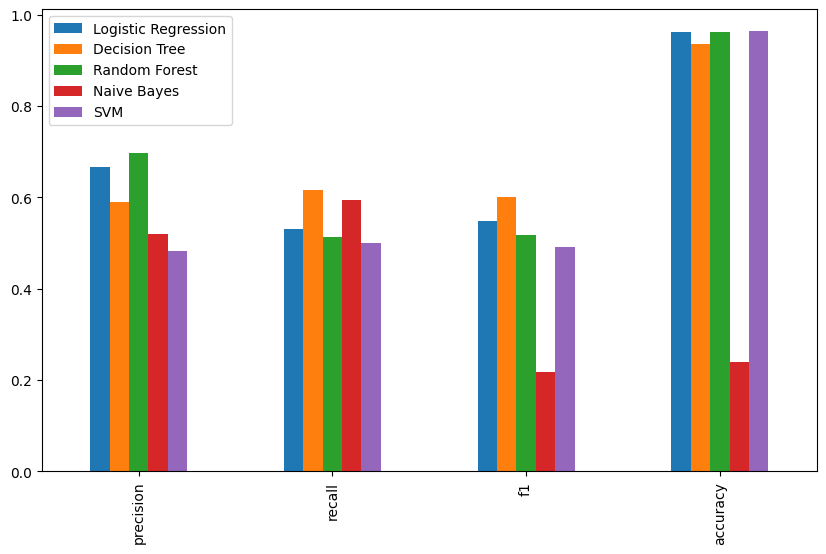

In [13]:
# scikit learn logistic regression (NOT DOWNSAMPLED)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(random_state=seed, max_iter=250),
    "Decision Tree": DecisionTreeClassifier(random_state=seed),
    "Random Forest": RandomForestClassifier(random_state=seed),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(random_state=seed)
}

results = {}
for name, model in models.items():
    print(name)

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    results[name] = explain(y_test, y_pred, average='macro')
    print("\n\n")

# plot the results as a hist
results_df = pd.DataFrame(results)
results_df.plot(kind='bar', figsize=(10, 6))

In [8]:
# WITH DOWNSAMPLED DATA

Logistic Regression


/opt/anaconda3/envs/hwenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precision:  0.7851010295021512
Recall:  0.6443171506352087
F1:  0.6832158460624495
Accuracy:  0.8995937318630296
Distribution (array([0, 1]), array([1627,   96]))



Decision Tree
Precision:  0.6326967200782366
Recall:  0.6372002203785325
F1:  0.6348785259964564
Accuracy:  0.8456181079512478
Distribution (array([0, 1]), array([1512,  211]))



Random Forest
Precision:  0.8164328203801888
Recall:  0.6586061057816956
F1:  0.7024572968455522
Accuracy:  0.905977945443993
Distribution (array([0, 1]), array([1628,   95]))



Naive Bayes
Precision:  0.5654718910272267
Recall:  0.6286670339642209
F1:  0.3722336563904751
Accuracy:  0.3900174114915844
Distribution (array([0, 1]), array([ 493, 1230]))



SVM
Precision:  0.4410911201392919
Recall:  0.5
F1:  0.4687018193031144
Accuracy:  0.8821822402785838
Distribution (array([0]), array([1723]))





<Axes: >

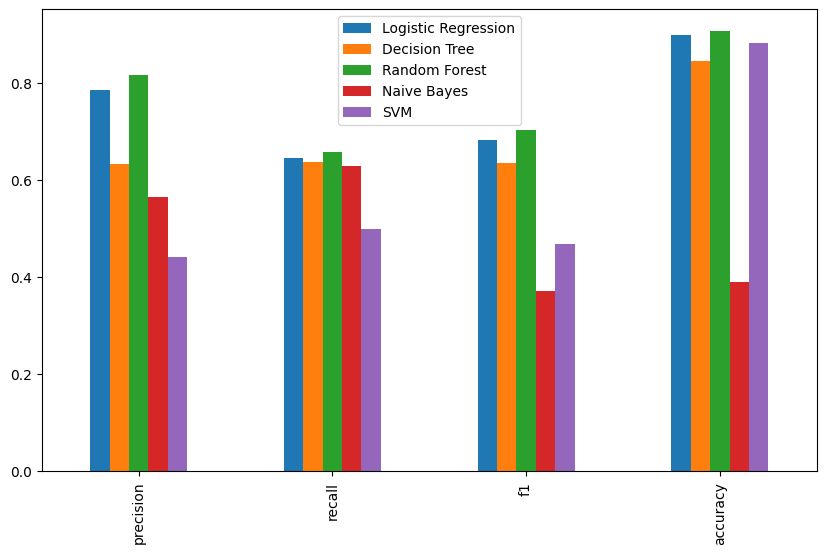

In [9]:
models = {
    "Logistic Regression": LogisticRegression(random_state=seed, max_iter=250),
    "Decision Tree": DecisionTreeClassifier(random_state=seed),
    "Random Forest": RandomForestClassifier(random_state=seed),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(random_state=seed)
}

results = {}
for name, model in models.items():
    print(name)

    model.fit(xd_train, yd_train)
    yd_pred = model.predict(xd_test)
    
    results[name] = explain(yd_test, yd_pred, average='macro')
    print("\n\n")

# plot the results as a hist
results_df = pd.DataFrame(results)
results_df.plot(kind='bar', figsize=(10, 6))